In [1]:
import pandas as pd
crime = pd.read_csv("/Users/Jennifer/Desktop/crime-in-los-angeles/Crime_Data_2010_2017.csv")

In [2]:
columns = ['DR Number', 'Area ID','Crime Code','MO Codes', 'Premise Code','Weapon Used Code','Status Code','Address','Cross Street']
crime.drop(columns, inplace=True, axis=1)
crime.rename(columns={'Date Reported': 'DateReported', 'Date Occurred': 'DateOccurred','Time Occurred':'TimeOccured',
                      'Area Name':'AreaName','Reporting District':'ReportingDistrict','Crime Code Description':'CrimeCodeDescription',
                      'Victim Age':'VictimAge','Victim Sex':'VictimSex','Victim Descent':'VictimDescent','Premise Description':'PremiseDescription',
                     'Status Description':'StatusDescription', 'Crime Code 1':'CrimeCode1','Crime Code 2':'CrimeCode2', 'Crime Code 3':'CrimeCode3',
                     'Crime Code 4':'CrimeCode4'}, inplace=True)
df = crime.loc[crime.CrimeCodeDescription == "ROBBERY",:]
SA = crime.loc[crime.CrimeCodeDescription == "BATTERY - SIMPLE ASSAULT",:]
crime_df = df.append(SA)
crime_df.head()



,DateReported,DateOccurred,TimeOccured,AreaName,ReportingDistrict,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,PremiseDescription,Weapon Description,StatusDescription,CrimeCode1,CrimeCode2,CrimeCode3,CrimeCode4,Location
28,01/12/2013,01/12/2013,1815,Central,105,ROBBERY,24.0,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,210.0,NaN,NaN,NaN,"(34.0688, -118.2333)"
39,01/20/2013,01/20/2013,1430,Central,135,ROBBERY,NaN,F,H,JEWELRY STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,210.0,998.0,NaN,NaN,"(34.0503, -118.2433)"
49,01/25/2013,01/25/2013,2305,Central,185,ROBBERY,57.0,M,H,PARKING LOT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,210.0,998.0,NaN,NaN,"(34.0405, -118.2567)"
50,01/28/2013,01/27/2013,1835,Central,176,ROBBERY,56.0,F,O,OTHER BUSINESS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,210.0,NaN,NaN,NaN,"(34.0383, -118.254)"
51,01/29/2013,01/28/2013,845,Central,152,ROBBERY,26.0,M,H,OTHER STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,210.0,NaN,NaN,NaN,"(34.0481, -118.2542)"


In [3]:
#### count of missing data
len(crime_df.index)-crime_df.count()

DateReported                 0
DateOccurred                 0
TimeOccured                  0
AreaName                     0
ReportingDistrict            0
CrimeCodeDescription         0
VictimAge                 7030
VictimSex                   61
VictimDescent               63
PremiseDescription         542
Weapon Description         842
StatusDescription            0
CrimeCode1                   2
CrimeCode2              198760
CrimeCode3              208920
CrimeCode4              209164
Location                     1
dtype: int64

In [4]:
# clean data
#

Text(0, 0.5, 'AREA NAME')

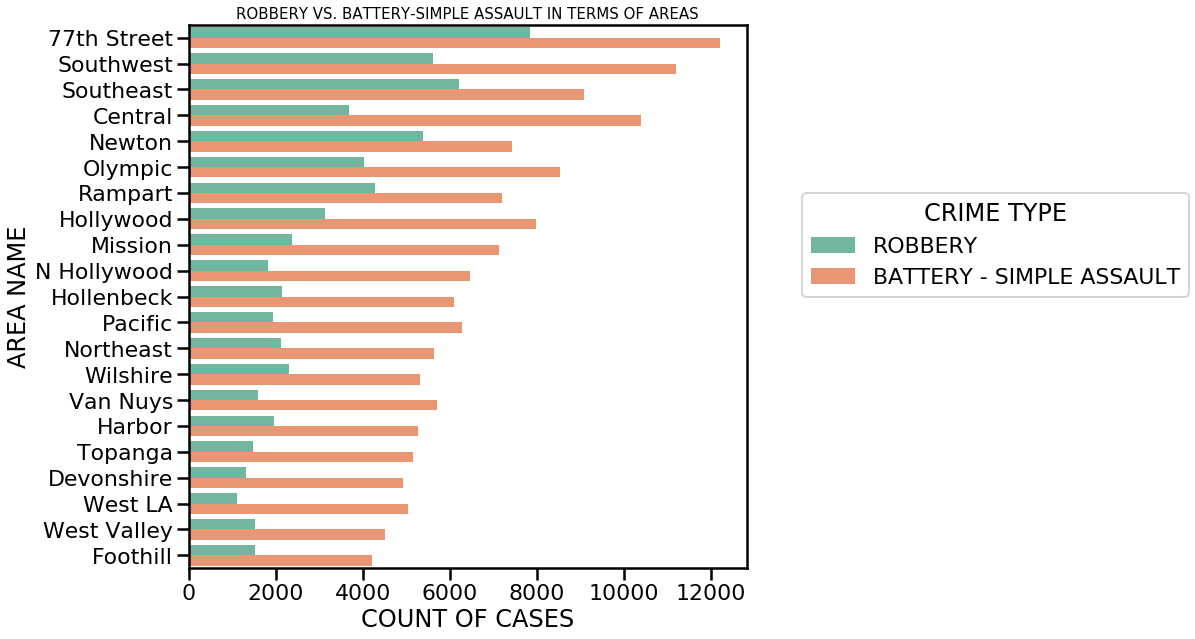

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
Area = crime_df["AreaName"]
plt.figure(figsize=(10, 10))
sns.countplot(y = Area, hue = crime_df["CrimeCodeDescription"],order = Area.value_counts(normalize = True).head(25).index,
             palette="Set2").set_title('ROBBERY VS. BATTERY-SIMPLE ASSAULT IN TERMS OF AREAS', size = 15)
sns.set_context("poster")
plt.legend(loc=(1.1,0.5), title = "CRIME TYPE")
plt.xlabel("COUNT OF CASES")
plt.ylabel("AREA NAME")

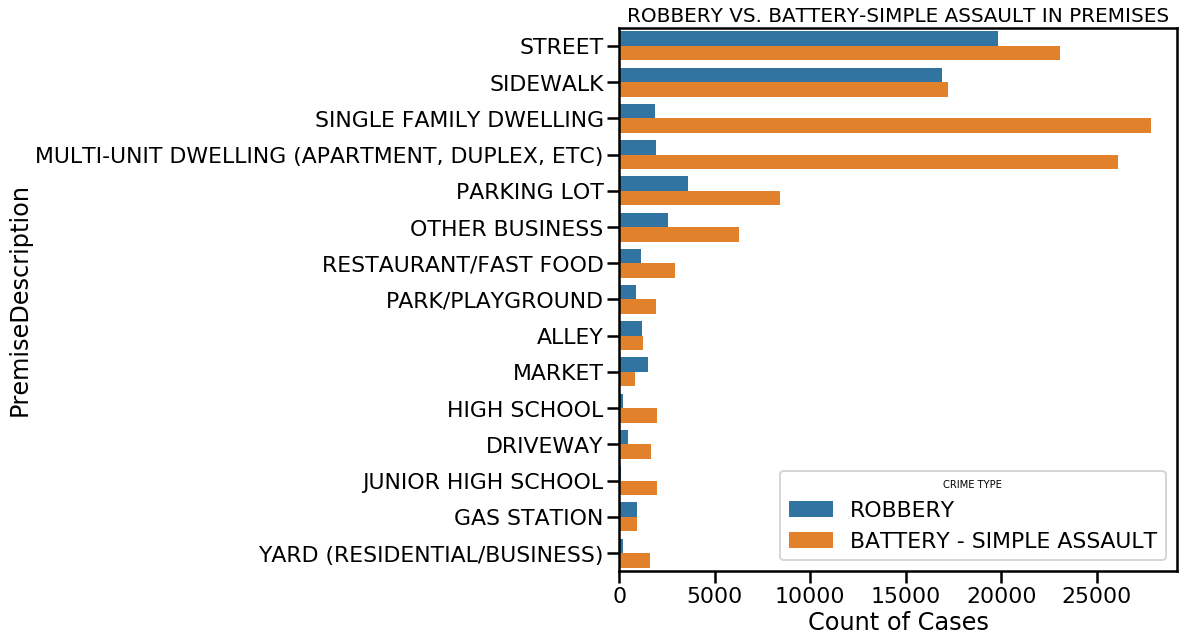

In [6]:
Prem = crime_df["PremiseDescription"]
plt.figure(figsize=(10, 10))
sns.countplot(y = Prem,hue = crime_df["CrimeCodeDescription"], order = Prem.value_counts(normalize = True).head(15).index).set_title('ROBBERY VS. BATTERY-SIMPLE ASSAULT IN PREMISES', size = 20)
plt.xlabel("Count of Cases")
plt.legend(title = "CRIME TYPE")
# The plot shows that robbery most often occurred in the street and sidewalk.
# Most simple assault cases occurred in single family detached homes and multi-unit homes.



In [109]:
d = {"H": "Hispanic/Latin/Mexican","B": "Black","O": "Other",
     "A": "Other Asian","C": "Chinese","W": "White",
     "D": "Cambodian","F": "Filipino","U": "Hawaiian",
     "G": "Guamanian","I": "American Indian/Alaskan Native",
     "J": "Japanese","K": "Korean","L": "Laotian",
     "P": "Pacific Islander","S": "Samoan","V": "Vietnamese","X": "Unknown",
     "Z": "Asian Indian"}
#df["VictimDescent"].map(d)

In [8]:
# plt.figure(figsize=(20, 20))
# name = df.PremiseDescription.unique()
# sns.set_context("poster")
# sns.countplot(y = Prem,hue = crime_df["VictimDescent"],order = Prem.value_counts(normalize = True).head(5).index,hue_order = ["H","B","W","O","X","A","K"],palette="Set1")


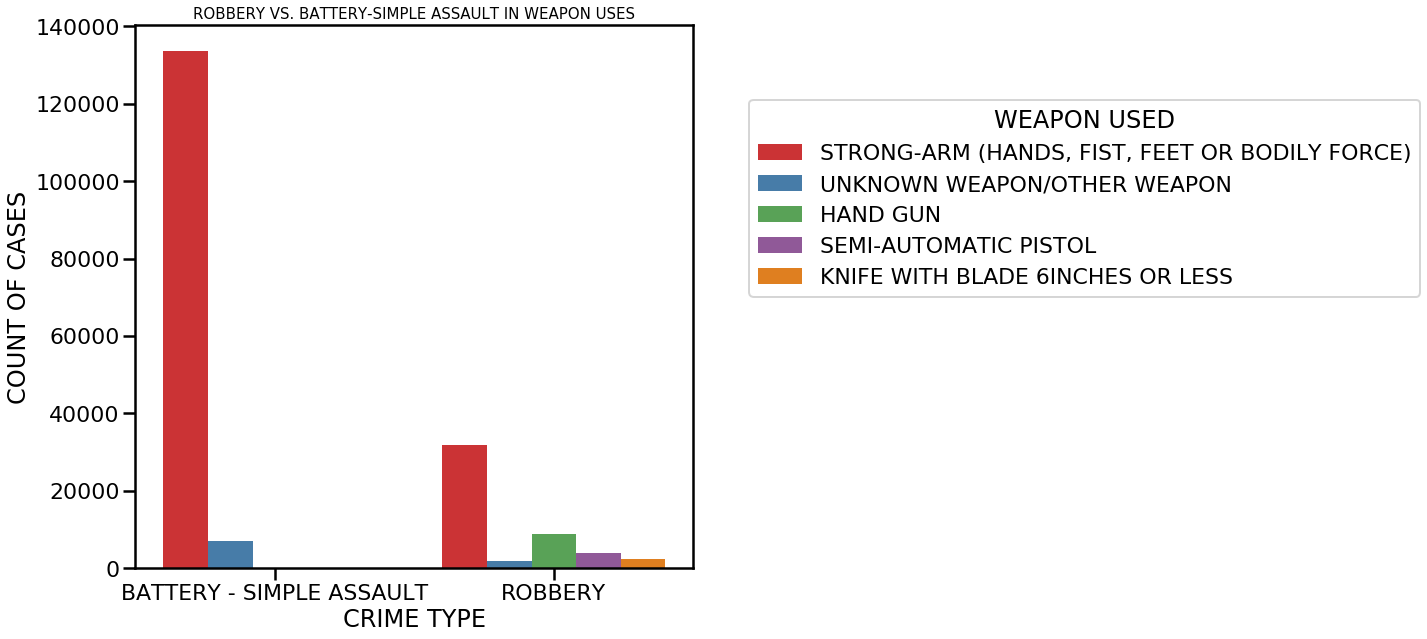

In [9]:
# Comparing weapon use in Robbery and Simple Assault
weapon1 = crime_df["Weapon Description"]
desc = crime_df["CrimeCodeDescription"]
plt.figure(figsize=(10, 10))
sns.countplot(x = desc, hue = weapon1,order = desc.value_counts(normalize = True).index,hue_order = weapon1.value_counts(normalize = True).head(5).index
,palette="Set1").set_title('ROBBERY VS. BATTERY-SIMPLE ASSAULT IN WEAPON USES', size = 15)
sns.set_context("poster")
plt.ylabel("COUNT OF CASES")
plt.xlabel("CRIME TYPE")
plt.legend(loc=(1.1,0.5), title = "WEAPON USED")

Text(0, 0.5, 'PREMISE DESCRIPTION')

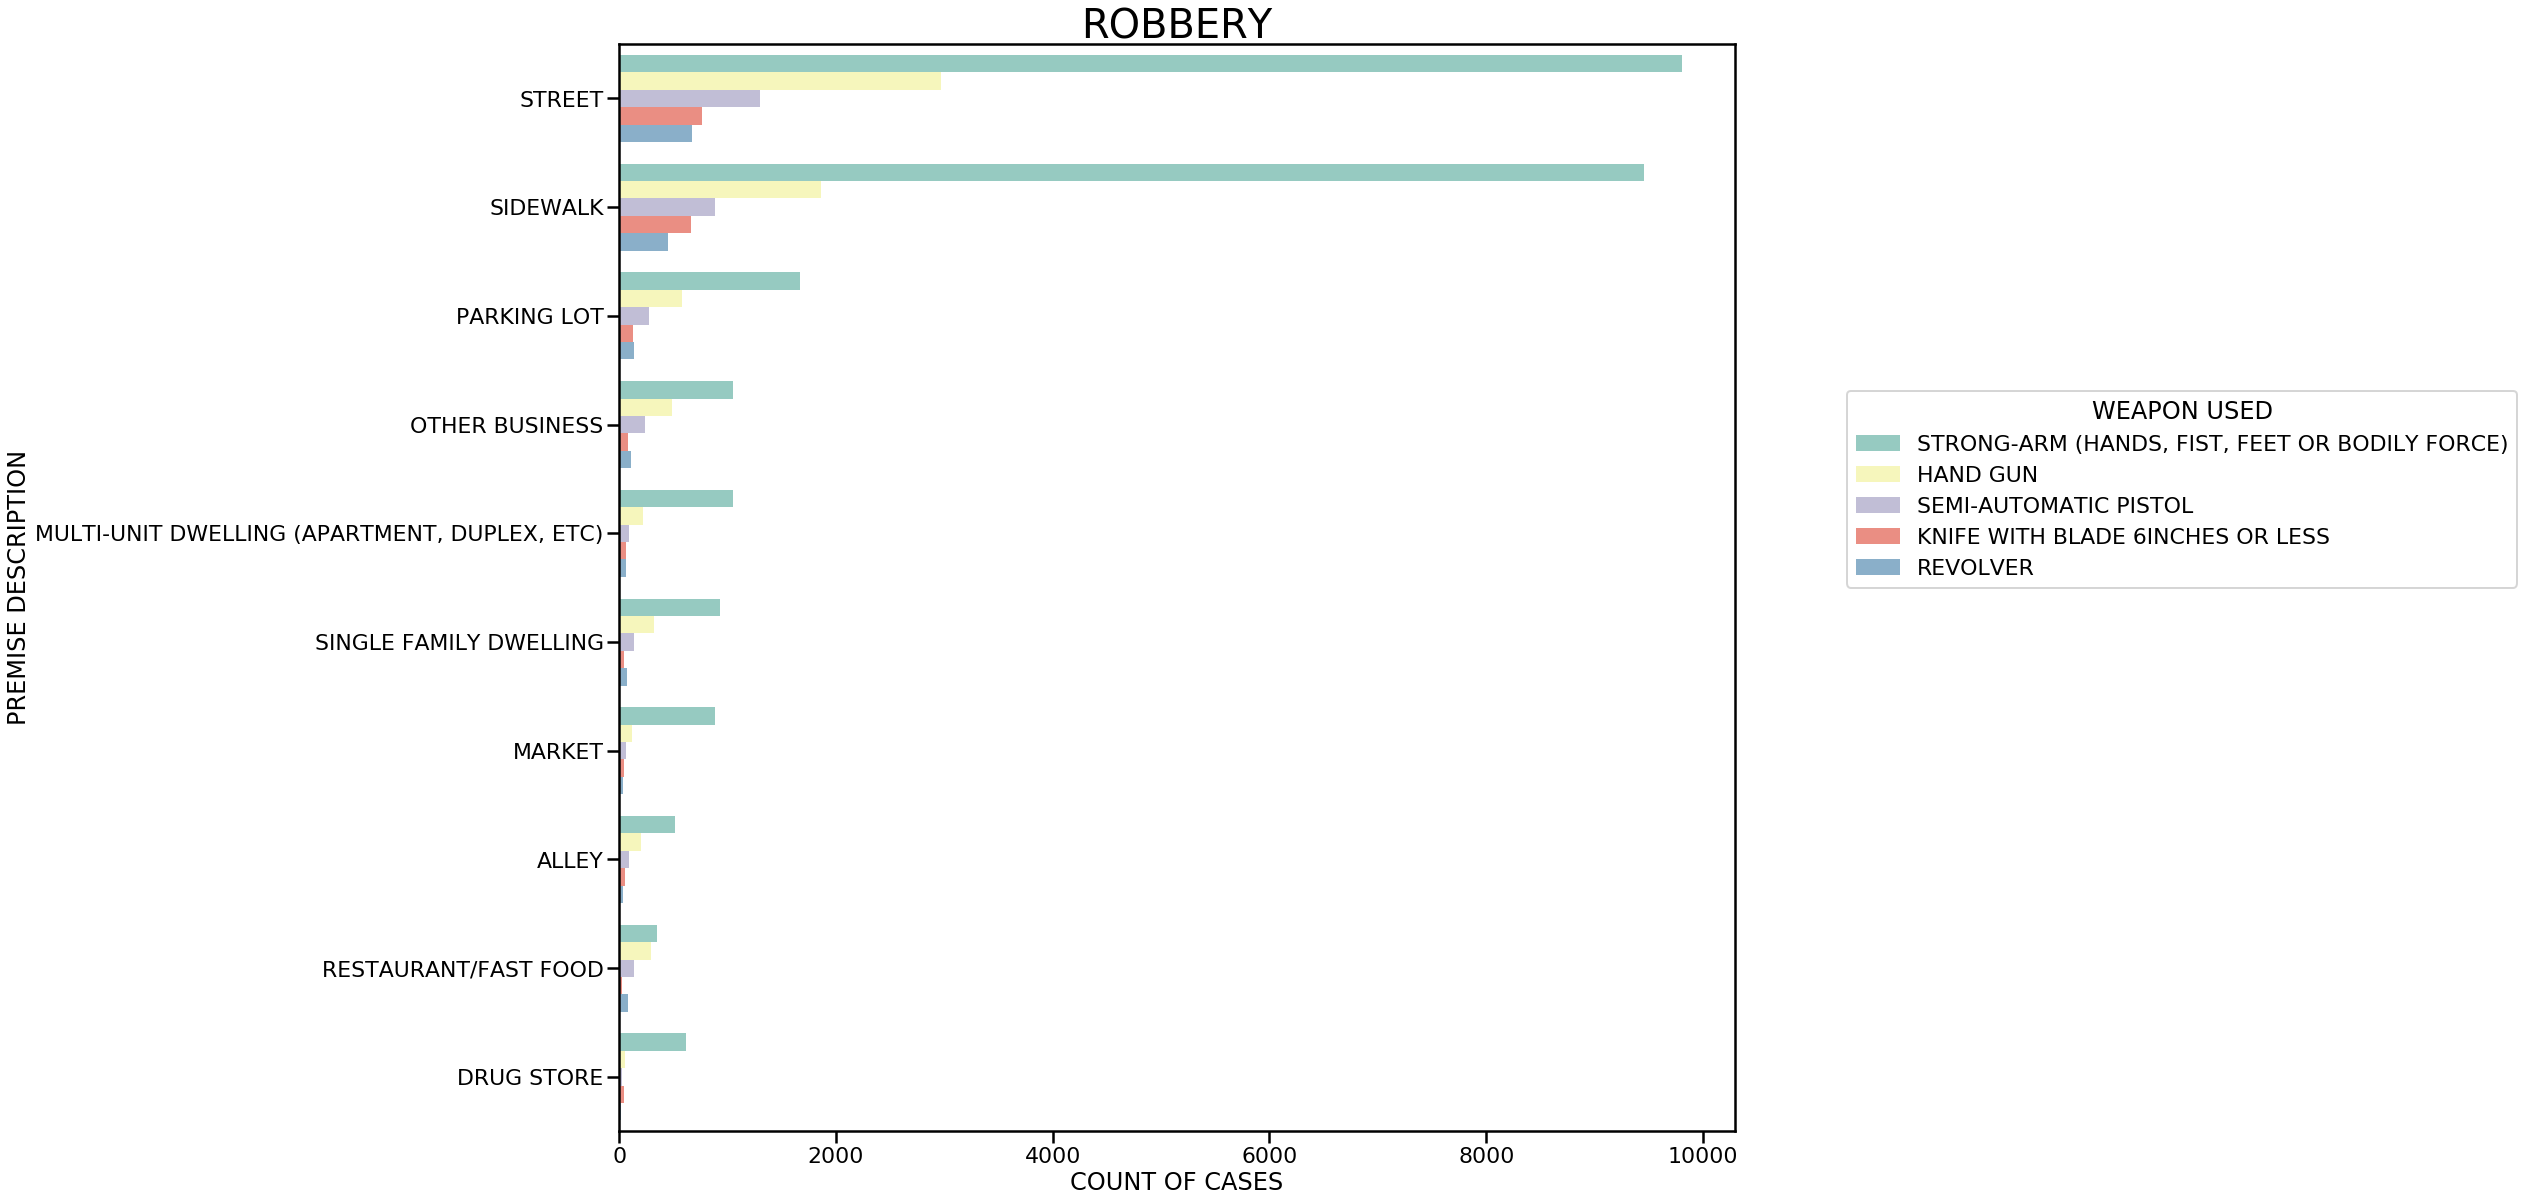

In [10]:
weapon = df["Weapon Description"]
Prem_r = df["PremiseDescription"]
plt.figure(figsize=(20, 20))
sns.countplot(y = Prem_r,hue = weapon,order = Prem_r.value_counts(normalize = True).head(10).index,hue_order = weapon.value_counts(normalize = True).head(5).index,
             palette="Set3").set_title('ROBBERY', size = 40)
plt.legend(loc=(1.1,0.5), title = "WEAPON USED")
plt.xlabel("COUNT OF CASES")
plt.ylabel("PREMISE DESCRIPTION")


Text(0, 0.5, 'PREMISE DESCRIPTION')

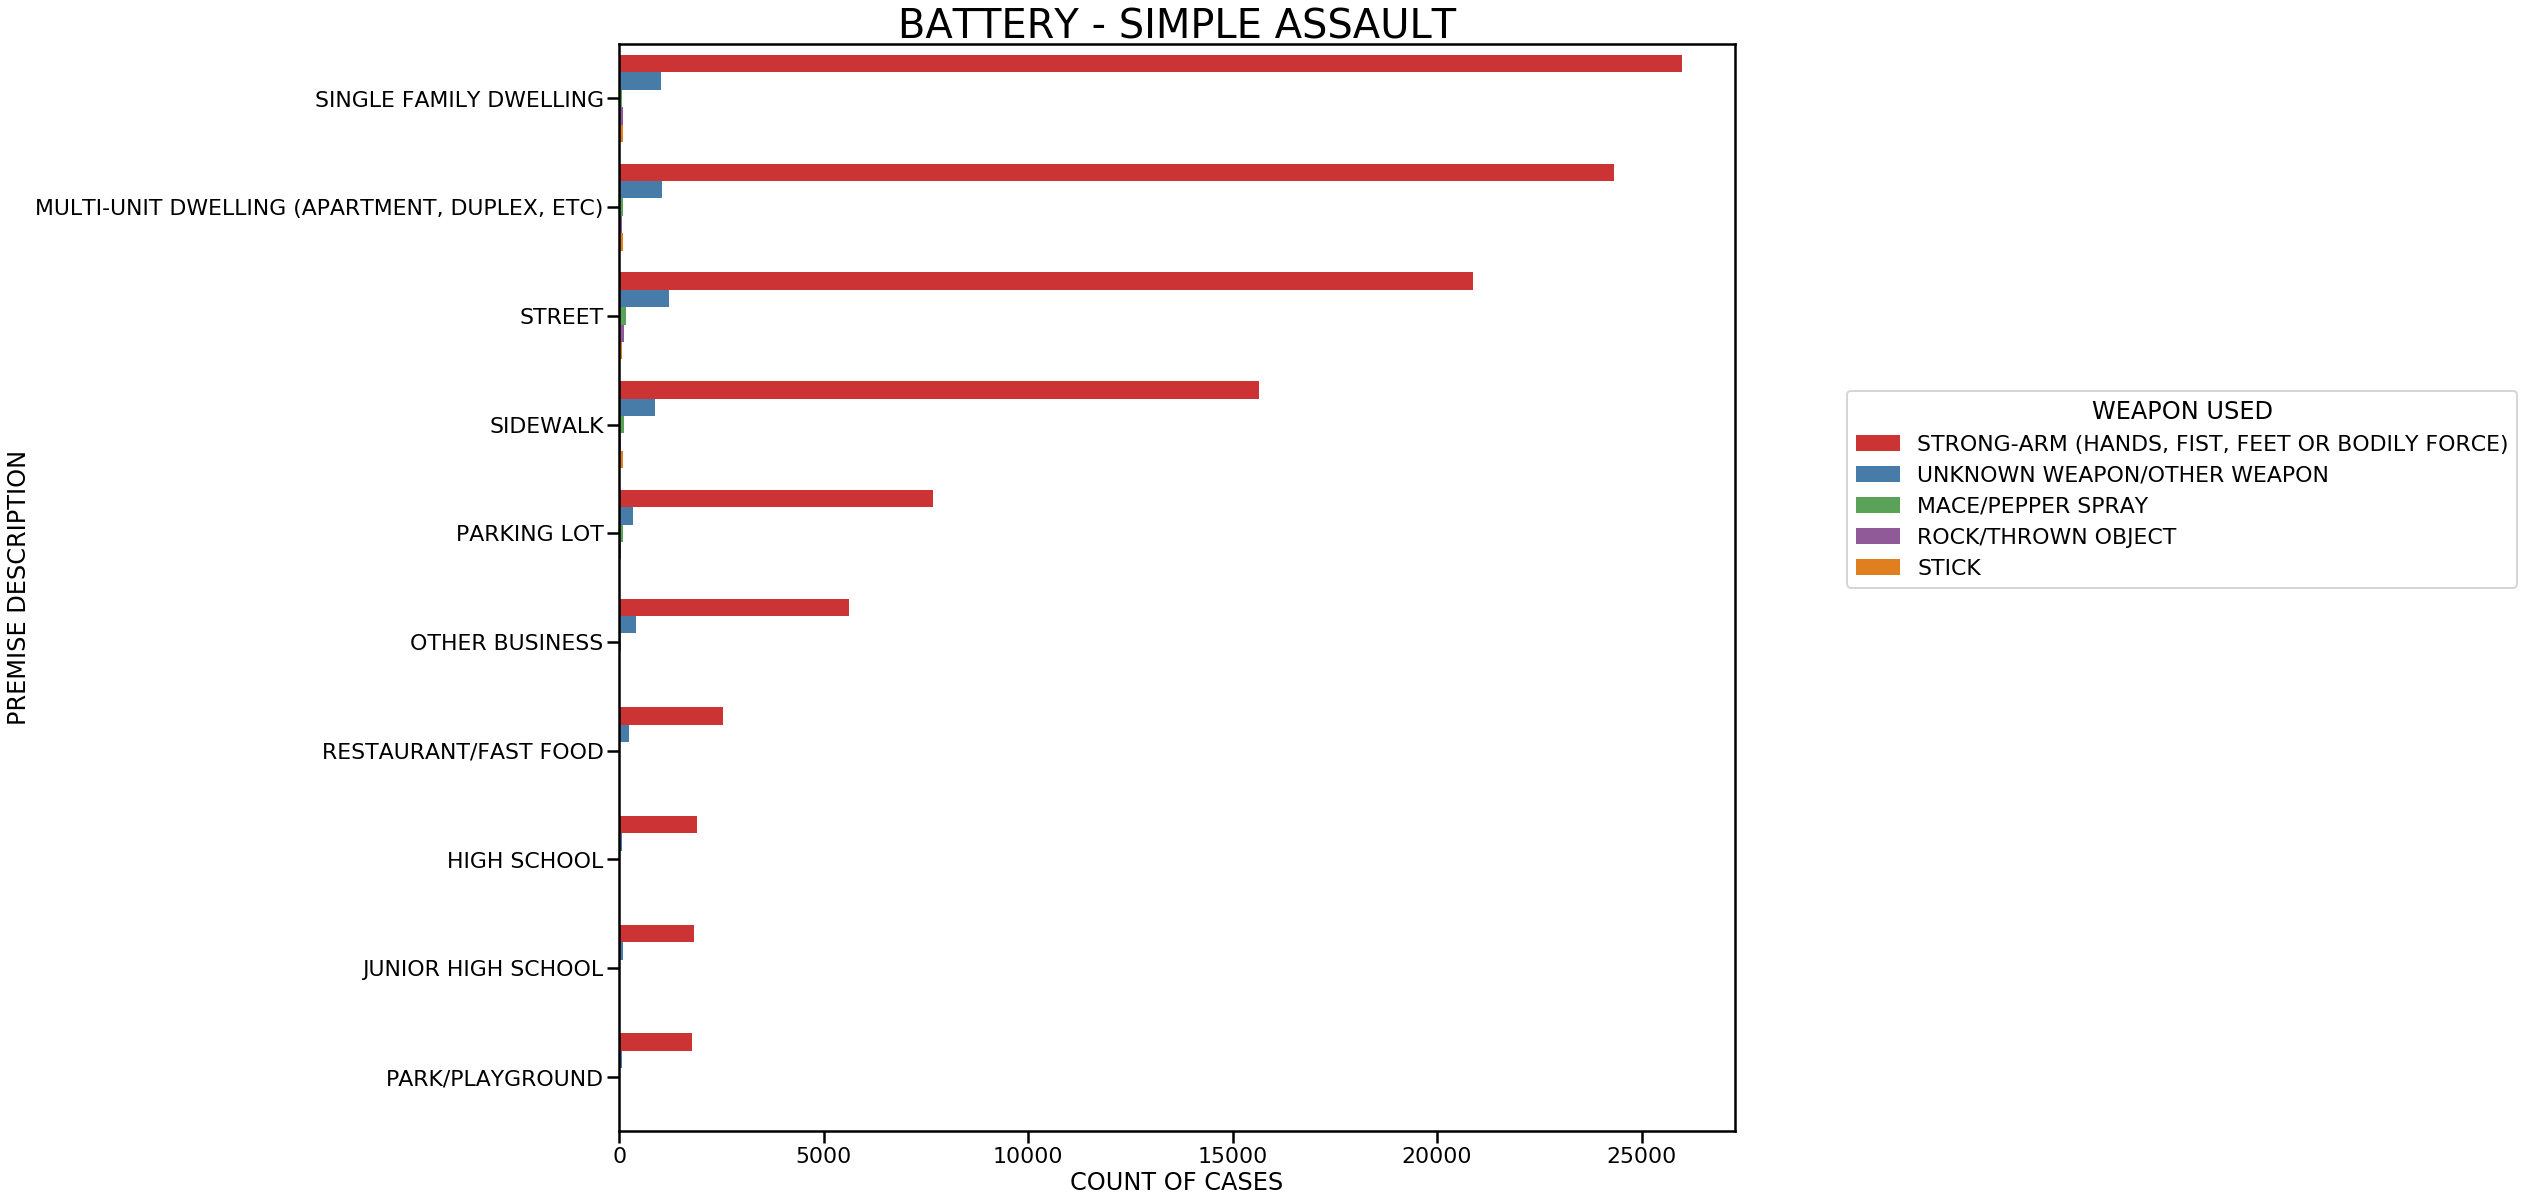

In [11]:
weapon = SA["Weapon Description"]
Prem_SA = SA["PremiseDescription"]
plt.figure(figsize=(20, 20))
sns.countplot(y = Prem_SA,hue = weapon,order = Prem_SA.value_counts(normalize = True).head(10).index,hue_order = weapon.value_counts(normalize = True).head(5).index,
             palette="Set1").set_title('BATTERY - SIMPLE ASSAULT', size = 40)
plt.legend(loc=(1.1,0.5), title = "WEAPON USED")
plt.xlabel("COUNT OF CASES")
plt.ylabel("PREMISE DESCRIPTION")

In [12]:
import geopandas as gpd
import gmplot
import folium
from folium import plugins
from folium.plugins import HeatMap

In [88]:
# Robbery on the Street
Rob1 = crime.loc[crime.CrimeCodeDescription == "ROBBERY"].loc[crime.PremiseDescription == "STREET"]
len(Rob1)
Location = Rob1.T.tail(1)
Location = Location.transpose()
Location.head()
len(Location)

19808

In [89]:
Longitude = []
for i in range(0,19807):
    Longitude.append(float(Location.unstack()[i].strip("()").split(",")[0]))

In [90]:
Latitude = []
for i in range(0,19807):
    Latitude.append(float(Location.unstack()[i].strip("()").split(",")[1]))

In [91]:
import numpy as np
Loc = np.column_stack([Longitude,Latitude])

In [103]:
LA_COORDINATES = (34.05223, -118.24368)
map1 = folium.Map(location=LA_COORDINATES, zoom_start=10)
map1
map1.add_child(plugins.HeatMap(Loc, radius=13))
# heatmap of Robbery on the Street

In [101]:
# Robbery on the Sidewalks
Rob2 = crime.loc[crime.CrimeCodeDescription == "ROBBERY"].loc[crime.PremiseDescription == "SIDEWALK"]
len(Rob2)
Location1 = Rob2.T.tail(1)
Location1 = Location1.transpose()
Location1.head()
len(Location1)

16923

In [105]:
Longitude1 = []
for i in range(0,16922):
    Longitude1.append(float(Location1.unstack()[i].strip("()").split(",")[0]))

In [106]:
Latitude1 = []
for i in range(0,16922):
    Latitude1.append(float(Location1.unstack()[i].strip("()").split(",")[1]))
    

In [107]:
import numpy as np
Loc1 = np.column_stack([Longitude1,Latitude1])

In [108]:
LA_COORDINATES = (34.05223, -118.24368)
map2 = folium.Map(location=LA_COORDINATES, zoom_start=10)
map2
map2.add_child(plugins.HeatMap(Loc1, radius=13))
# heatmap of Robbery on the Sidewalks